In [7]:
!pip install xgboost





Defaulting to user installation because normal site-packages is not writeable
                                              0.0/56.8 MB ? eta -:--:--
                                              0.0/56.8 MB 1.3 MB/s eta 0:00:45
                                             0.0/56.8 MB 487.6 kB/s eta 0:01:57
                                             0.1/56.8 MB 751.6 kB/s eta 0:01:16
                                             0.1/56.8 MB 726.2 kB/s eta 0:01:19
                                              0.2/56.8 MB 1.1 MB/s eta 0:00:54
                                              0.3/56.8 MB 1.0 MB/s eta 0:00:57
                                              0.4/56.8 MB 1.4 MB/s eta 0:00:40
                                              0.5/56.8 MB 1.5 MB/s eta 0:00:38
                                              0.7/56.8 MB 1.7 MB/s eta 0:00:33
                                              0.8/56.8 MB 1.8 MB/s eta 0:00:32
                                              1.1/56.8 MB


[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# Grafik çizmek veri veri çekmek için kullanılan  modüller
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Algoritmaları kullanmak için gerekli olan modüller
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [9]:
bos = df.isnull().sum()
print(bos)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Datatype object olan verileri int veri tipine dönüştürdük. 

In [12]:
sex=df['Sex']
sex.replace({'M':1,'F':0},inplace=True)
new_sex = pd.DataFrame(sex,columns=['Sex'])
new_sex


C:\Users\atunc\AppData\Local\Temp\ipykernel_30084\1951479871.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sex.replace({'M':1,'F':0},inplace=True)


,Sex
0,1
1,0
2,1
3,0
4,1
...,...
913,1
914,1
915,1
916,0


ChestPainType göğüs ağrısı türü.

Veri setimizdeki ChestPainType sütundaki değerleri sütun adı olarak değiştirip datatype'da bool değere çevirdik. 


ASY => Asemptomatik, belirgin bir göğüs ağrısı belirtisi olmayan durumu ifade eder.


ATA =>  Atipik angina, klasik angina (göğüs ağrısı) belirtilerinin dışında kalan, ancak yine de kalp ile ilgili olabilecek göğüs ağrısı türlerini ifade eder.


NAP => Anjina (kalp kaynaklı göğüs ağrısı) ile ilgili olmayan göğüs ağrısı türlerini ifade eder. Bu tür ağrılar genellikle kalp dışı nedenlerle ilişkilidir. Sindirim sorunları, kas-iskelet sistemi rahatsızlıkları veya diğer nedenlerle ortaya çıkan göğüs ağrıları


TA => Tipik angina, fiziksel efor veya stres ile tetiklenen, dinlenme veya nitrogliserin ile rahatlayan, klasik kalp kaynaklı göğüs ağrısını ifade eder.

In [13]:
chestPainType = df['ChestPainType']
one_hot_ChestPainType = pd.get_dummies(chestPainType)
one_hot_ChestPainType


,ASY,ATA,NAP,TA
0,False,True,False,False
1,False,False,True,False
2,False,True,False,False
3,True,False,False,False
4,False,False,True,False
...,...,...,...,...
913,False,False,False,True
914,True,False,False,False
915,True,False,False,False
916,False,True,False,False


Datatype'i bool olanları int'e çevirdik

In [14]:
new_onehot = one_hot_ChestPainType.astype(int)
new_onehot

,ASY,ATA,NAP,TA
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
913,0,0,0,1
914,1,0,0,0
915,1,0,0,0
916,0,1,0,0


In [15]:
concat_data = pd.concat([new_sex,new_onehot],axis=1) # iki dataframe'i birleştirdik
concat_data

,Sex,ASY,ATA,NAP,TA
0,1,0,1,0,0
1,0,0,0,1,0
2,1,0,1,0,0
3,0,1,0,0,0
4,1,0,0,1,0
...,...,...,...,...,...
913,1,0,0,0,1
914,1,1,0,0,0
915,1,1,0,0,0
916,0,0,1,0,0


RestingECG Dinlenme Kan Basıncı.

Veri setimizdeki RestingECG sütundaki değerleri sütun adı olarak değiştirip datatype'da bool değere çevirdik.

LVH => Sol ventrikülün (kalbin sol alt odacığı) duvarlarının kalınlaşmasıdır. Bu durum, genellikle kalp kasının daha fazla çalışması gerektiğinde ortaya çıkar.

Normal =>  EKG'nin normal olması, kalp ritminin ve iletim yollarının normal olduğunu ve ciddi bir kalp hastalığı belirtisi olmadığını gösterir.

ST =>  EKG'de QRS kompleksinden sonra gelen ve T dalgasından önce başlayan bölümdür. ST segmenti, ventriküllerin depolarizasyonunun bitişini ve repolarizasyonun başlangıcını temsil eder.

In [16]:
restingECG_data = df['RestingECG']
true_false_RestingECG = pd.get_dummies(restingECG_data)
true_false_RestingECG


,LVH,Normal,ST
0,False,True,False
1,False,True,False
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
913,False,True,False
914,False,True,False
915,False,True,False
916,True,False,False


Bool datatypeları int'e çevirdik

In [17]:
new_onehot_RestingECG = true_false_RestingECG.astype(int)
new_onehot_RestingECG

,LVH,Normal,ST
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
913,0,1,0
914,0,1,0
915,0,1,0
916,1,0,0


In [18]:
new_concat_data = pd.concat([concat_data,new_onehot_RestingECG],axis=1) # dataframeleri birleştirdik
new_concat_data

,Sex,ASY,ATA,NAP,TA,LVH,Normal,ST
0,1,0,1,0,0,0,1,0
1,0,0,0,1,0,0,1,0
2,1,0,1,0,0,0,0,1
3,0,1,0,0,0,0,1,0
4,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...
913,1,0,0,0,1,0,1,0
914,1,1,0,0,0,0,1,0
915,1,1,0,0,0,0,1,0
916,0,0,1,0,0,1,0,0


One-Hot Encoding işlemi yaptık

In [19]:
exerciseAngina = df['ExerciseAngina']
exerciseAngina.replace({'N':0,'Y':1},inplace=True)
new_ExerciseAngina = pd.DataFrame(exerciseAngina,columns=['ExerciseAngina'])
new_ExerciseAngina

C:\Users\atunc\AppData\Local\Temp\ipykernel_30084\3940637201.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  exerciseAngina.replace({'N':0,'Y':1},inplace=True)


,ExerciseAngina
0,0
1,0
2,0
3,1
4,0
...,...
913,0
914,0
915,1
916,0


Veri setimizdeki ST_Slope sütundaki değerleri sütun adı olarak değiştirip datatype'da bool değere çevirdik.

ST_Slope  terimi, tıpta elektrokardiyogram (EKG) üzerinde ST segmentinin eğimini ifade eder. ST segmenti, kalbin elektriksel aktivitesinin bir parçasıdır ve QRS kompleksi ile T dalgası arasında yer alır. ST segmentinin eğimi, kalp kasının oksijenlenme durumu hakkında önemli bilgiler verir ve genellikle stres testi sırasında değerlendirilir.

Upsloping (Yukarı Eğilimli) => ST segmenti yukarı doğru eğimlidir.

Flat (Yatay) => ST segmenti yataydır, izoelektrik hat ile paraleldir.

Downsloping (Aşağı Eğilimli) => ST segmenti aşağı doğru eğimlidir.

In [20]:
st_Slope_data = df['ST_Slope']
true_false_st_Slope_data = pd.get_dummies(st_Slope_data)
true_false_st_Slope_data

,Down,Flat,Up
0,False,False,True
1,False,True,False
2,False,False,True
3,False,True,False
4,False,False,True
...,...,...,...
913,False,True,False
914,False,True,False
915,False,True,False
916,False,True,False


In [21]:
new_int_st_Slope_data = true_false_st_Slope_data.astype(int) # dataframeleri birleştirdik
new_int_st_Slope_data

,Down,Flat,Up
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1
...,...,...,...
913,0,1,0
914,0,1,0
915,0,1,0
916,0,1,0


In [22]:
yeni_concat = pd.concat([new_ExerciseAngina,new_int_st_Slope_data],axis=1)
yeni_concat

,ExerciseAngina,Down,Flat,Up
0,0,0,0,1
1,0,0,1,0
2,0,0,0,1
3,1,0,1,0
4,0,0,0,1
...,...,...,...,...
913,0,0,1,0
914,0,0,1,0
915,1,0,1,0
916,0,0,1,0


In [23]:
new_concat_data2 = pd.concat([new_concat_data,yeni_concat],axis=1)
new_concat_data2

,Sex,ASY,ATA,NAP,TA,LVH,Normal,ST,ExerciseAngina,Down,Flat,Up
0,1,0,1,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,1,0,0,0,1,0
2,1,0,1,0,0,0,0,1,0,0,0,1
3,0,1,0,0,0,0,1,0,1,0,1,0
4,1,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,0,0,0,1,0,1,0,0,0,1,0
914,1,1,0,0,0,0,1,0,0,0,1,0
915,1,1,0,0,0,0,1,0,1,0,1,0
916,0,0,1,0,0,1,0,0,0,0,1,0


In [24]:
heartDisease = df['HeartDisease']
heartDisease2 = pd.DataFrame(heartDisease,columns=['HeartDisease'])
heartDisease2

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
913,1
914,1
915,1
916,1


In [25]:
new_concat_data3 = pd.concat([new_concat_data2,heartDisease2],axis=1)
new_concat_data3

,Sex,ASY,ATA,NAP,TA,LVH,Normal,ST,ExerciseAngina,Down,Flat,Up,HeartDisease
0,1,0,1,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,1,0,1
2,1,0,1,0,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,1,0,1,0,1,0,1
4,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,0,0,0,1,0,1,0,0,0,1,0,1
914,1,1,0,0,0,0,1,0,0,0,1,0,1
915,1,1,0,0,0,0,1,0,1,0,1,0,1
916,0,0,1,0,0,1,0,0,0,0,1,0,1


In [26]:
new_df = df[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']]
new_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0
...,...,...,...,...,...,...
913,45,110,264,0,132,1.2
914,68,144,193,1,141,3.4
915,57,130,131,0,115,1.2
916,57,130,236,0,174,0.0


In [27]:
istatistik = df[['Age','RestingBP','Cholesterol','MaxHR']]
istatistik

,Age,RestingBP,Cholesterol,MaxHR
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122
...,...,...,...,...
913,45,110,264,132
914,68,144,193,141
915,57,130,131,115
916,57,130,236,174


In [28]:
new_concat_df = pd.concat([new_df,new_concat_data3],axis=1)
new_concat_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex,ASY,ATA,NAP,TA,LVH,Normal,ST,ExerciseAngina,Down,Flat,Up,HeartDisease
0,40,140,289,0,172,0.0,1,0,1,0,0,0,1,0,0,0,0,1,0
1,49,160,180,0,156,1.0,0,0,0,1,0,0,1,0,0,0,1,0,1
2,37,130,283,0,98,0.0,1,0,1,0,0,0,0,1,0,0,0,1,0
3,48,138,214,0,108,1.5,0,1,0,0,0,0,1,0,1,0,1,0,1
4,54,150,195,0,122,0.0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,0,0,1,0,1,0,0,0,1,0,1
914,68,144,193,1,141,3.4,1,1,0,0,0,0,1,0,0,0,1,0,1
915,57,130,131,0,115,1.2,1,1,0,0,0,0,1,0,1,0,1,0,1
916,57,130,236,0,174,0.0,0,0,1,0,0,1,0,0,0,0,1,0,1


Veri setimizdeki tüm verilerin datatype'ı int veya float olduğunu görüyoruz

In [29]:
new_concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   RestingBP       918 non-null    int64  
 2   Cholesterol     918 non-null    int64  
 3   FastingBS       918 non-null    int64  
 4   MaxHR           918 non-null    int64  
 5   Oldpeak         918 non-null    float64
 6   Sex             918 non-null    int64  
 7   ASY             918 non-null    int64  
 8   ATA             918 non-null    int64  
 9   NAP             918 non-null    int64  
 10  TA              918 non-null    int64  
 11  LVH             918 non-null    int64  
 12  Normal          918 non-null    int64  
 13  ST              918 non-null    int64  
 14  ExerciseAngina  918 non-null    int64  
 15  Down            918 non-null    int64  
 16  Flat            918 non-null    int64  
 17  Up              918 non-null    int

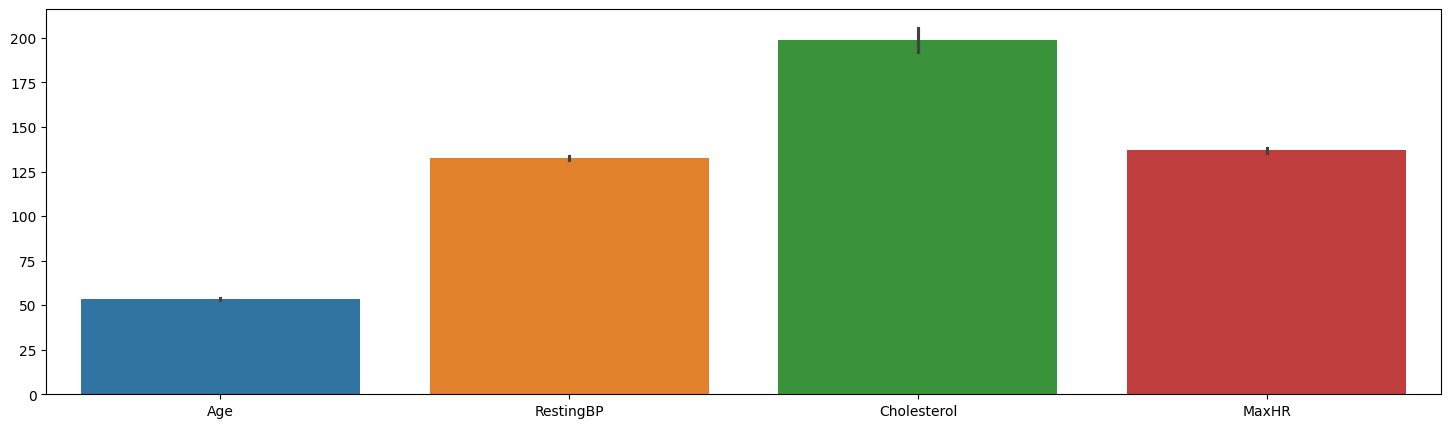

In [30]:
# Bar Grafiği
plt.figure(figsize=(18, 5))
sns.barplot(data=istatistik)
plt.show()




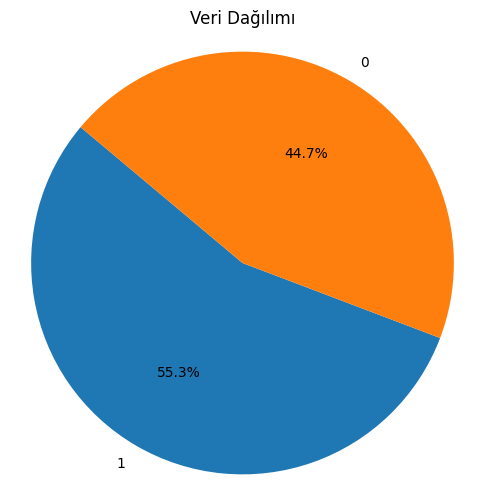

In [31]:
 #Etiketlerin ve boyutların hazırlanması
etiket = new_concat_df['HeartDisease']
labels = etiket.value_counts().index.tolist()  # Etiketler
sizes = etiket.value_counts().values.tolist()  # Veri boyutları

# Pasta grafiği çizimi
plt.figure(figsize=(6, 6))  # Grafiğin boyutunu ayarla
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Eşit ölçekli daire şeklinde görüntüleme
plt.title('Veri Dağılımı')  # Grafik başlığı ekle
plt.show()  

1' yakın değerler pozitif bir ilişki olduğunu gösterir , bir artartken diğeride artar.

-1' yakın olan değerler negatif bir ilişki olduğunu gösterir. bir artarken diğeri azalır.

0' yakın değerler anlamlı bir ilişki olmadığını gösterir.

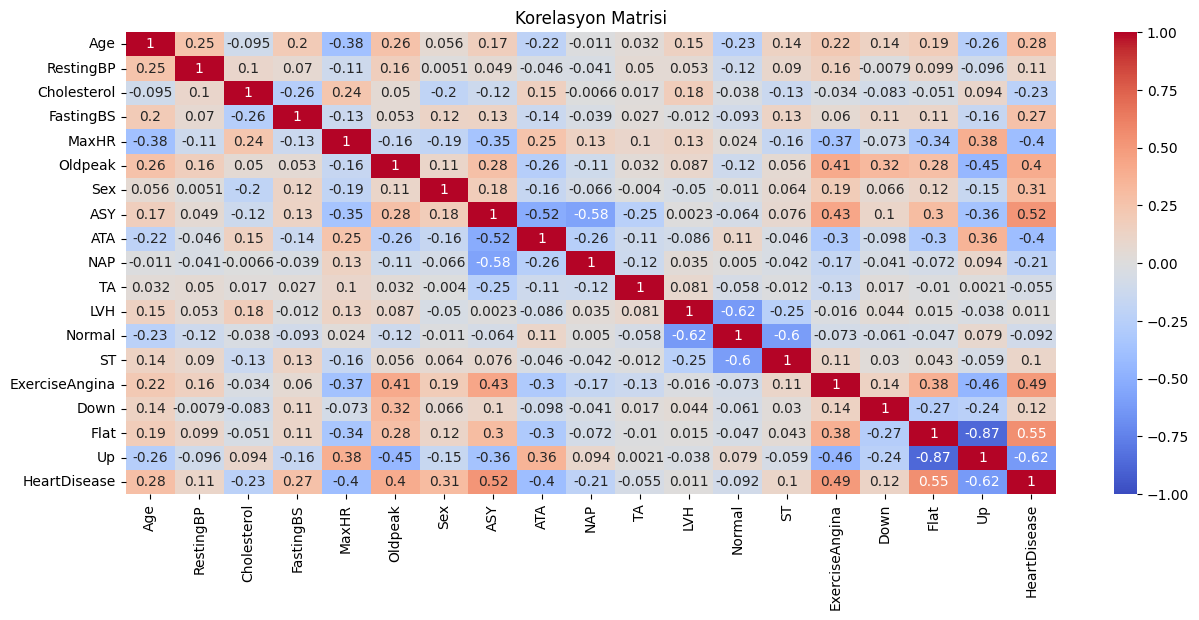

In [32]:

# Korelasyon matrisini hesaplayın
correlation_matrix = new_concat_df.corr()

# Korelasyon matrisini görselleştirin
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasyon Matrisi')
plt.show()


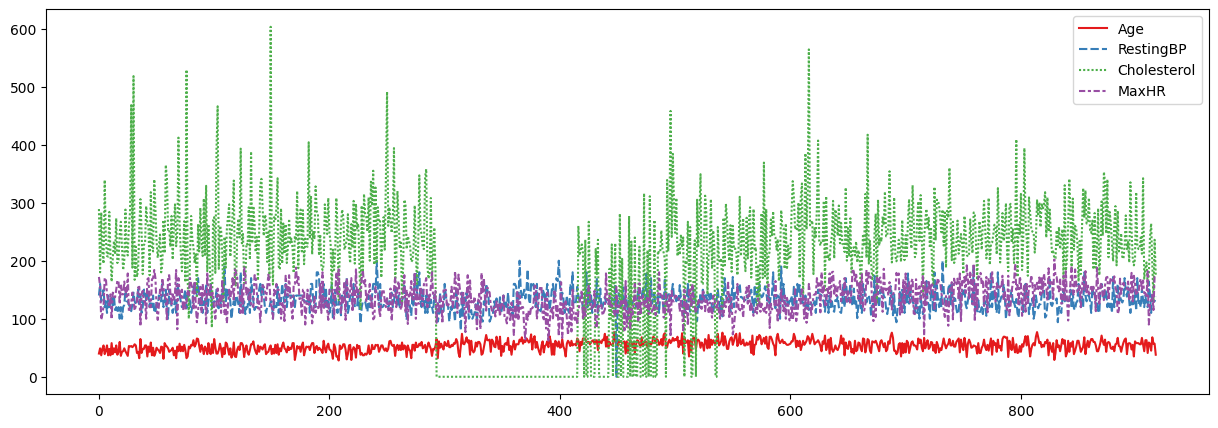

In [33]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=istatistik, palette='Set1')
plt.show()

KNeighborsClassifier algoritmasının tahmin fonksiyonu

def d(x,x[i]):

        for j=1 in range(n):

            deger = deger + (x[j]-x[i][j])**2
    
        return deger**1/2

x yeni veri noktasıdır.

x[i] eğitim veri setindeki i. veri noktası

x[j] ve x[i][j] sırası ile x[i]'nin j'inci özellikleridir

n özelliklerin sayısıdır

'KNeighborsClassifier algoritmasında predict fonksiyonu, bir veri noktası için en yakın


k komşunun sınıf etiketlerine dayanarak sınıf tahmini yapar.

# StandartScaler Nedir?

StandardScaler, verileri standart hale getirmek için kullanılan bir dönüştürücüdür. Bu, veriyi ortalaması 0 ve standart sapması 1 olacak şekilde dönüştürür.Her bir özelliğin (değişkenin) değerlerinin, o özelliğin ortalamasının çıkarılması ve ardından o özelliğin standart sapmasına bölünmesi ile elde edilir.

Fit => Bu aşamada, dönüştürücü eğitim verisinin özelliklerine göre öğrenir. Örneğin,  StandarScaler'ı kullanarak eğitim verisinin ortalama ve standart sapmasını hesaplar.

Transform => transform aşamasında, dönüştürücü öğrendiği bu bilgiyi kullanarak veriyi dönüştürür. veriyi standart hale getirir.

In [34]:
label = new_concat_df['HeartDisease']
coklu_sutun = new_concat_df[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','Sex','ASY','ATA','NAP','TA','LVH','Normal','ST','ExerciseAngina','Down','Flat','Up']]

# Train/Test Split
X_train,X_test,y_train,y_test = train_test_split(coklu_sutun,label,test_size=0.3,random_state=42,)

scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

tag = ['Hasta','Sağlıklı']

print("Accuracy : ", accuracy_score(y_test,y_pred))
print("")
print('classification Report : \n', classification_report(y_test,y_pred,target_names=tag))



Accuracy :  0.8514492753623188

classification Report : 
               precision    recall  f1-score   support

       Hasta       0.77      0.90      0.83       112
    Sağlıklı       0.92      0.82      0.87       164

    accuracy                           0.85       276
   macro avg       0.85      0.86      0.85       276
weighted avg       0.86      0.85      0.85       276



# MultinomialNB Algoritması

P(w[i] | C[k]) = (C[k] sınıfındaki w[i] sayısı + alpha) / (C[k] sınıfındaki toplam kelime sayısı + alpha*toplam kelime sayısı)


In [35]:
min_scaler = MinMaxScaler()
X_sclaed = min_scaler.fit_transform(coklu_sutun)

X2_train,X2_test,y2_train,y2_test = train_test_split(X_sclaed,label,test_size=0.33,random_state=42,)

multinomialNB = MultinomialNB()
multinomialNB.fit(X2_train,y2_train)

mulNB = multinomialNB.predict(X2_test)

print("Accuracy : ", accuracy_score(y2_test,mulNB))
print("")
print('classification Report : \n', classification_report(y2_test,mulNB,target_names=tag))

Accuracy :  0.858085808580858

classification Report : 
               precision    recall  f1-score   support

       Hasta       0.79      0.88      0.83       123
    Sağlıklı       0.91      0.84      0.88       180

    accuracy                           0.86       303
   macro avg       0.85      0.86      0.86       303
weighted avg       0.86      0.86      0.86       303



In [36]:
X3_train,X3_test,y3_train,y3_test = train_test_split(coklu_sutun,label,test_size=0.2,random_state=42,)

sgd_scaler = StandardScaler()
X_train_scaled = sgd_scaler.fit_transform(X3_train)
X_test_scaled = sgd_scaler.transform(X3_test)

sgd = SGDClassifier(random_state=42)
sgd.fit(X_train_scaled,y3_train)

sgd_pred = sgd.predict(X_test_scaled)

print("Accuracy : ", accuracy_score(y3_test,sgd_pred))
print("")
print('classification Report : \n', classification_report(y3_test,sgd_pred,target_names=tag))

Accuracy :  0.8315217391304348

classification Report : 
               precision    recall  f1-score   support

       Hasta       0.76      0.88      0.81        77
    Sağlıklı       0.90      0.79      0.85       107

    accuracy                           0.83       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.83      0.83       184



# LogisticRegression Algoritması

formülü: 1/(1+e^(b0+b1x1+b2x2+...+bnxn)) 

b modelin katsayısı

x bağımsız değişkenler

In [37]:
X4_train,X4_test,y4_train,y4_test = train_test_split(coklu_sutun,label,test_size=0.3,random_state=42,)

loreg = LogisticRegression()
loreg.fit(X4_train,y4_train)

loreg_pred = loreg.predict(X4_test)

print("Accuracy : ", accuracy_score(y4_test,loreg_pred))
print("")
print('classification Report : \n', classification_report(y4_test,loreg_pred,target_names=tag))

Accuracy :  0.8840579710144928

classification Report : 
               precision    recall  f1-score   support

       Hasta       0.83      0.90      0.86       112
    Sağlıklı       0.93      0.87      0.90       164

    accuracy                           0.88       276
   macro avg       0.88      0.89      0.88       276
weighted avg       0.89      0.88      0.88       276



C:\Users\atunc\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
X5_train,X5_test,y5_train,y5_test = train_test_split(coklu_sutun,label,test_size=0.2,random_state=42,)

randomforest = RandomForestClassifier(random_state=42)
randomforest.fit(X5_train,y5_train)

#TAHMİN 
randomforest_pred = randomforest.predict(X5_test)

print("Accuracy : ", accuracy_score(y5_test,randomforest_pred))
print("")
print('classification Report : \n', classification_report(y5_test,randomforest_pred,target_names=tag))

Accuracy :  0.8967391304347826

classification Report : 
               precision    recall  f1-score   support

       Hasta       0.86      0.90      0.88        77
    Sağlıklı       0.92      0.90      0.91       107

    accuracy                           0.90       184
   macro avg       0.89      0.90      0.89       184
weighted avg       0.90      0.90      0.90       184



# XGBClassifier Algoritması

y_pred_total = sum(model.predict_proba(X_test) for model in model.estimators_)


y_pred_average = y_pred_total / len(model.estimators_)


y_pred_final = y_pred_average.argmax(axis=1)

In [39]:
X6_train,X6_test,y6_train,y6_test = train_test_split(coklu_sutun,label,test_size=0.3,random_state=42,)

xgb = XGBClassifier(random_state = 42)
xgb.fit(X6_train,y6_train)

xgb_pred = xgb.predict(X6_test)

print("Accuracy : ", accuracy_score(y6_test,xgb_pred))
print("")
print('classification Report : \n', classification_report(y6_test,xgb_pred,target_names=tag))

Accuracy :  0.8731884057971014

classification Report : 
               precision    recall  f1-score   support

       Hasta       0.82      0.88      0.85       112
    Sağlıklı       0.91      0.87      0.89       164

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.88      0.87      0.87       276



In [40]:
X7_train,X7_test,y7_train,y7_test = train_test_split(coklu_sutun,label,test_size=0.3,random_state=55)

svc = SVC()
svc.fit(X7_train,y7_train)

svc_pred = svc.predict(X7_test)

print("Accuracy : ", accuracy_score(y7_test,svc_pred))
print("")
print('classification Report : \n', classification_report(y7_test,svc_pred,target_names=tag))

Accuracy :  0.7463768115942029

classification Report : 
               precision    recall  f1-score   support

       Hasta       0.71      0.73      0.72       123
    Sağlıklı       0.78      0.76      0.77       153

    accuracy                           0.75       276
   macro avg       0.74      0.74      0.74       276
weighted avg       0.75      0.75      0.75       276



In [41]:
X8_train,X8_test,y8_train,y8_test = train_test_split(coklu_sutun,label,test_size=0.2,random_state=42)

des_tree = DecisionTreeClassifier(random_state=42)
des_tree.fit(X8_train,y8_train)

des_tree_pred = des_tree.predict(X8_test)

print("Accuracy : ", accuracy_score(y8_test,des_tree_pred))
print("")
print('classification Report : \n', classification_report(y8_test,des_tree_pred,target_names=tag))

Accuracy :  0.8152173913043478

classification Report : 
               precision    recall  f1-score   support

       Hasta       0.75      0.83      0.79        77
    Sağlıklı       0.87      0.80      0.83       107

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.82      0.82      0.82       184



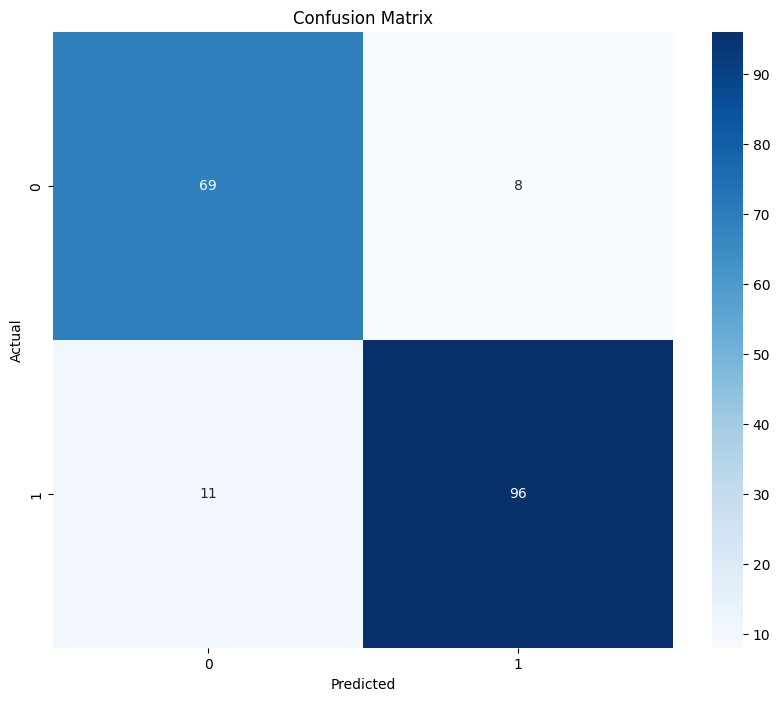

In [42]:
conf_matris = confusion_matrix(y5_test,randomforest_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matris, annot=True,fmt='d' , cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

AUC DEĞERİ :  0.942468746207064


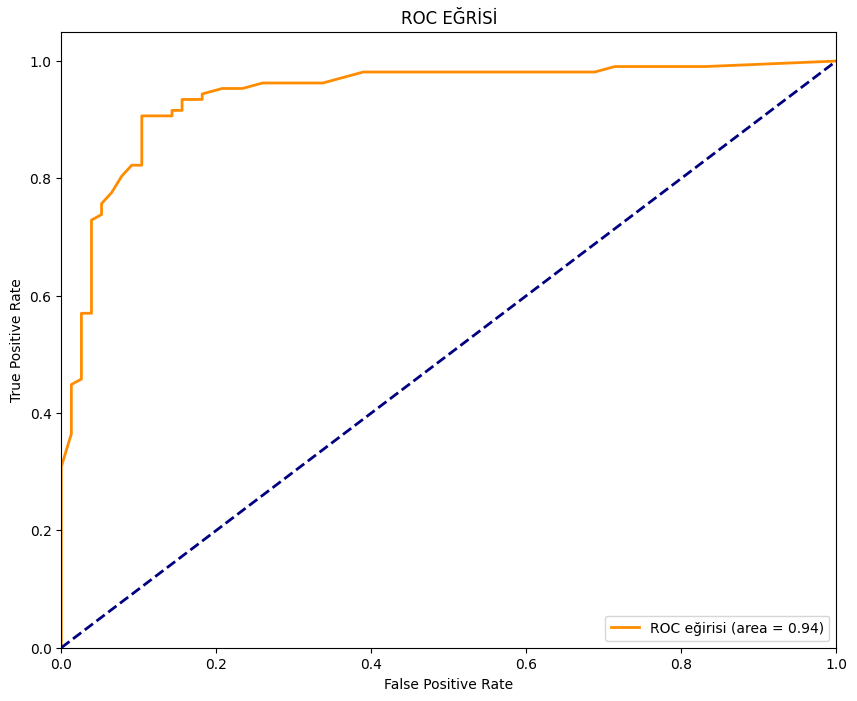

In [43]:
y_probs = randomforest.predict_proba(X5_test)[:,1]
fpr, tpr, thresholds = roc_curve(y5_test,y_probs)
roc_auc = auc(fpr, tpr)

print(f'AUC DEĞERİ :  {roc_auc}')

plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color="darkorange",lw=2,label=f'ROC eğirisi (area = {roc_auc:.2f})')
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--',)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC EĞRİSİ')
plt.legend(loc='lower right')
plt.show()

In [44]:


yavuz = {'Age':[23],'RestingBP':[120],'Cholesterol':[198],'FastingBS':[0],'MaxHR':[191],'Oldpeak':[0.0],'Sex':[1],'ASY':[0],'ATA':[1],
         'NAP':[0],'TA':[0],'LVH':[0],'Normal':[1],'ST':[0],'ExerciseAngina':[0],'Down':[0],'Flat':[1],'Up':[0]}
yavuz_df = pd.DataFrame(yavuz)
tahmin_yavuz_df = randomforest.predict(yavuz_df)
print(f'yavuz kişisi için tahmin edilen sınıf: {tahmin_yavuz_df[0]}')

hastana_tahmin = {'Age':[80],'RestingBP':[140],'Cholesterol':[104],'FastingBS':[1],'MaxHR':[151],'Oldpeak':[0.0],'Sex':[1],'ASY':[0],
                  'ATA':[0],'NAP':[0],'TA':[1],'LVH':[0],'Normal':[0],'ST':[1],'ExerciseAngina':[1],'Down':[0],'Flat':[1],'Up':[0]}
hastana_tahmin_df = pd.DataFrame(hastana_tahmin)
tahmin_hastana_tahmin_df = randomforest.predict(hastana_tahmin_df)
print(f'Hasta kişisi için tahmin edilen sınıf: {tahmin_hastana_tahmin_df[0]}')

hastana_tahmin2 = {'Age':[58],'RestingBP':[130],'Cholesterol':[104],'FastingBS':[1],'MaxHR':[100],'Oldpeak':[0.0],'Sex':[1],'ASY':[0],
                   'ATA':[0],'NAP':[0],'TA':[1],'LVH':[0],'Normal':[1],'ST':[0],'ExerciseAngina':[1],'Down':[0],'Flat':[1],'Up':[0]}
hastana_tahmin2_df = pd.DataFrame(hastana_tahmin2)
tahmin_hastana_tahmin2_df = randomforest.predict(hastana_tahmin2_df)
print(f'2. Hasta  kişisi için tahmin edilen sınıf: {tahmin_hastana_tahmin2_df[0]}')

new_concat_df.loc[19]

yavuz kişisi için tahmin edilen sınıf: 0
Hasta kişisi için tahmin edilen sınıf: 1
2. Hasta  kişisi için tahmin edilen sınıf: 1


Age                36.0
RestingBP         120.0
Cholesterol       267.0
FastingBS           0.0
MaxHR             160.0
Oldpeak             3.0
Sex                 1.0
ASY                 0.0
ATA                 1.0
NAP                 0.0
TA                  0.0
LVH                 0.0
Normal              1.0
ST                  0.0
ExerciseAngina      0.0
Down                0.0
Flat                1.0
Up                  0.0
HeartDisease        1.0
Name: 19, dtype: float64

In [45]:
accuracy ={'Algoritma':['Random Forest','LogisticRegression','XGBClassifier','MultinomialNB','KNeighborsClassifier','SGDClassifier','DecisionTreeClassifier','SVC'],
           'Accuracy':[0.8967,0.8840,0.8731,0.8580,0.8514,0.8315,0.8152,0.7463],
           'Hasta-precision':[0.86,0.83,0.82,0.79,0.77,0.76,0.75,0.71],
           'Sağlıklı-precision':[0.92,0.93,0.91,0.91,0.92,0.90,0.87,0.78],
           'Hasta-recall':[0.90,0.90,0.88,0.88,0.90,0.88,0.83,0.73],
           'Sağlıklı-recall':[0.90,0.87,0.87,0.84,0.82,0.79,0.80,0.76],
           'Hasta-f1_score':[0.88,0.86,0.85,0.83,0.83,0.81,0.79,0.72],
           'Sağlıklı-f1_score':[0.91,0.90,0.89,0.88,0.87,0.85,0.83,0.77],
           'Hasta-support':[77,112,112,123,112,77,77,123],
           'Sağlıklı-support':[107,164,164,180,164,107,107,153]}
accuracy_df = pd.DataFrame(accuracy)
accuracy_df 

,Algoritma,Accuracy,Hasta-precision,Sağlıklı-precision,Hasta-recall,Sağlıklı-recall,Hasta-f1_score,Sağlıklı-f1_score,Hasta-support,Sağlıklı-support
0,Random Forest,0.8967,0.86,0.92,0.90,0.90,0.88,0.91,77,107
1,LogisticRegression,0.8840,0.83,0.93,0.90,0.87,0.86,0.90,112,164
2,XGBClassifier,0.8731,0.82,0.91,0.88,0.87,0.85,0.89,112,164
3,MultinomialNB,0.8580,0.79,0.91,0.88,0.84,0.83,0.88,123,180
4,KNeighborsClassifier,0.8514,0.77,0.92,0.90,0.82,0.83,0.87,112,164
5,SGDClassifier,0.8315,0.76,0.90,0.88,0.79,0.81,0.85,77,107
6,DecisionTreeClassifier,0.8152,0.75,0.87,0.83,0.80,0.79,0.83,77,107
7,SVC,0.7463,0.71,0.78,0.73,0.76,0.72,0.77,123,153


In [46]:

y5_test_array = np.array(y5_test)

y5_test_array_df =pd.DataFrame(y5_test_array)

y5_test_array_df

,0
0,0
1,1
2,1
3,1
4,0
...,...
179,1
180,1
181,1
182,0


In [47]:
randomforest_pred_df = pd.DataFrame(randomforest_pred)
randomforest_pred_df 

,0
0,0
1,1
2,1
3,1
4,0
...,...
179,1
180,1
181,1
182,0


In [48]:
pred_concat = pd.concat([y5_test_array_df,randomforest_pred_df],axis=1,keys=['Gerçek','Tahmin'])
pred_concat

,Gerçek,Tahmin
,0,0
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
179,1,1
180,1,1
181,1,1


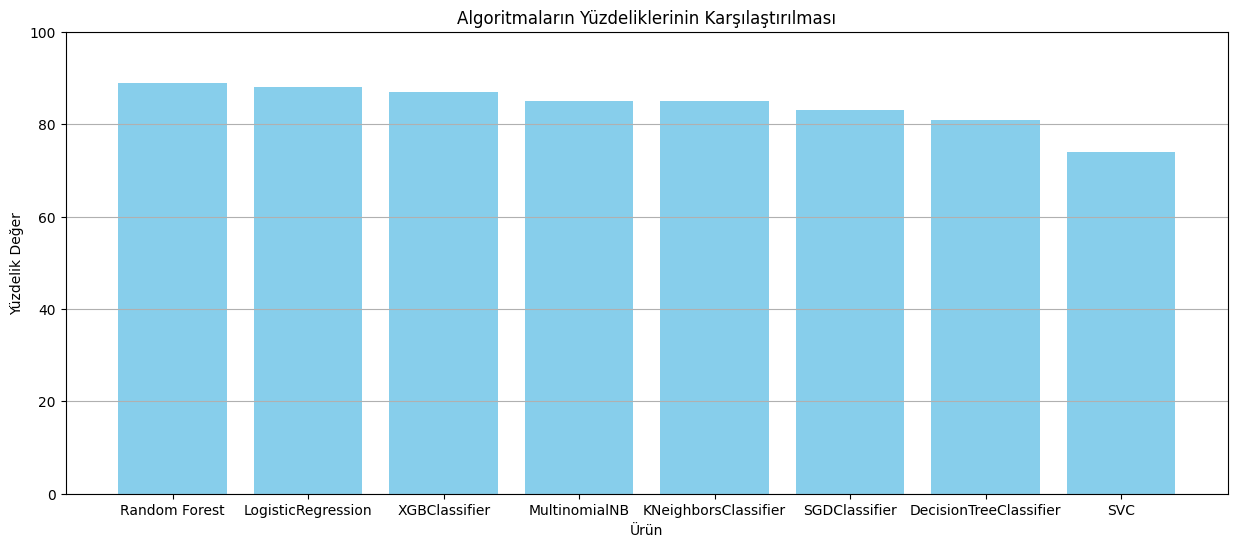

In [49]:



products = ['Random Forest', 'LogisticRegression', 'XGBClassifier', 'MultinomialNB', 
            'KNeighborsClassifier', 'SGDClassifier', 'DecisionTreeClassifier','SVC']
percentages = [89, 88, 87, 85, 85, 83, 81,74]  # Örnek veri

# Grafik çizimi
plt.figure(figsize=(15, 6))
plt.bar(products, percentages, color='skyblue')

plt.xlabel('Ürün')
plt.ylabel('Yüzdelik Değer')
plt.title('Algoritmaların Yüzdeliklerinin Karşılaştırılması')
plt.ylim(0, 100)  # Y ekseninin limitlerini belirleme
plt.grid(axis='y')
plt.show()


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import joblib

df = pd.read_csv("heart.csv")
categorical_columns = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

joblib.dump(model, "random_forest_model.pkl")
joblib.dump(encoders, "encoders.pkl")


['encoders.pkl']